<a href="https://colab.research.google.com/github/AbrarAmiya/Multiple-Linear-Regression-Models/blob/main/Multiple_Linear_Regression_Predicting_Bedrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('sample_data/california_housing_train.csv')
df

longitude  latitude  ...  median_income  median_house_value
0        -114.31     34.19  ...         1.4936             66900.0
1        -114.47     34.40  ...         1.8200             80100.0
2        -114.56     33.69  ...         1.6509             85700.0
3        -114.57     33.64  ...         3.1917             73400.0
4        -114.57     33.57  ...         1.9250             65500.0
...          ...       ...  ...            ...                 ...
16995    -124.26     40.58  ...         2.3571            111400.0
16996    -124.27     40.69  ...         2.5179             79000.0
16997    -124.30     41.84  ...         3.0313            103600.0
16998    -124.30     41.80  ...         1.9797             85800.0
16999    -124.35     40.54  ...         3.0147             94600.0

[17000 rows x 9 columns]

# Correlation between variables

In [ ]:
df.corr()['total_bedrooms']

longitude             0.071802
latitude             -0.069373
housing_median_age   -0.320434
total_rooms           0.928403
total_bedrooms        1.000000
population            0.881169
households            0.980920
median_income        -0.013495
median_house_value    0.045783
Name: total_bedrooms, dtype: float64

In [ ]:
bedrooms = df['total_bedrooms']
df = df.drop(['total_bedrooms', 'longitude', 'latitude', 'housing_median_age', 'median_income', 'median_house_value'], axis=1)
df['bedrooms'] = bedrooms
df

total_rooms  population  households  bedrooms
0           5612.0      1015.0       472.0    1283.0
1           7650.0      1129.0       463.0    1901.0
2            720.0       333.0       117.0     174.0
3           1501.0       515.0       226.0     337.0
4           1454.0       624.0       262.0     326.0
...            ...         ...         ...       ...
16995       2217.0       907.0       369.0     394.0
16996       2349.0      1194.0       465.0     528.0
16997       2677.0      1244.0       456.0     531.0
16998       2672.0      1298.0       478.0     552.0
16999       1820.0       806.0       270.0     300.0

[17000 rows x 4 columns]

# Dropping the variables which has the strong correlation here 

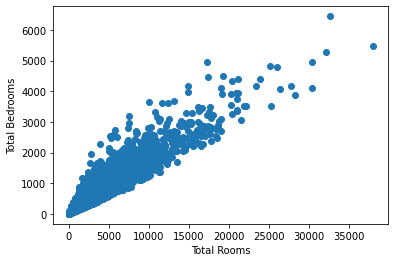

In [ ]:
import matplotlib.pyplot as plt
 

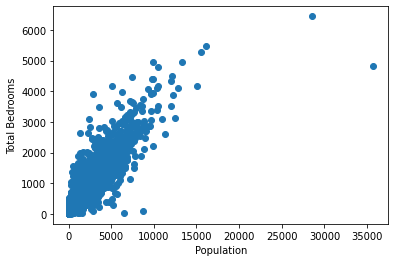

In [ ]:
plt.scatter(df['population'], df['bedrooms'])
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')
plt.show()

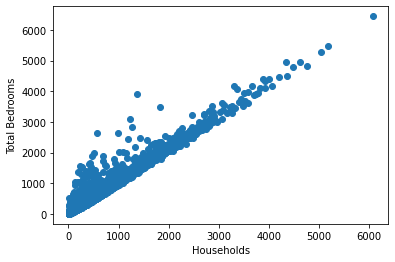

In [ ]:
plt.scatter(df['households'], df['bedrooms'])
plt.xlabel('Households')
plt.ylabel('Total Bedrooms')
plt.show()

# Builting the Linear Model

In [ ]:
df_np = df.to_numpy()
df_np.shape

(17000, 4)

In [ ]:
X_train, y_train = df_np[:, :3], df_np[:, -1]
X_train.shape, y_train.shape

((17000, 3), (17000,))

In [ ]:
X_train

array([[5612., 1015.,  472.],
       [7650., 1129.,  463.],
       [ 720.,  333.,  117.],
       ...,
       [2677., 1244.,  456.],
       [2672., 1298.,  478.],
       [1820.,  806.,  270.]])

In [ ]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression().fit(X_train, y_train)
sklearn_y_predictions = sklearn_model.predict(X_train)
sklearn_y_predictions

array([631.82986004, 693.11956219, 130.849378  , ..., 502.56126019,
       522.07260277, 304.4499167 ])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(sklearn_y_predictions, y_train), mean_squared_error(sklearn_y_predictions, y_train)

(39.672217650706656, 5650.631822167879)

In [ ]:
predictions_df = pd.DataFrame({'Population': df['population'],
                               'Households': df['households'],
                               'Total Rooms': df['total_rooms'],
                               'Bedrooms': df['bedrooms'],
                               'Sklearn Bedroom Predictions':sklearn_y_predictions})
predictions_df

Population  Households  ...  Bedrooms  Sklearn Bedroom Predictions
0          1015.0       472.0  ...    1283.0                   631.829860
1          1129.0       463.0  ...    1901.0                   693.119562
2           333.0       117.0  ...     174.0                   130.849378
3           515.0       226.0  ...     337.0                   259.462982
4           624.0       262.0  ...     326.0                   289.315311
...           ...         ...  ...       ...                          ...
16995       907.0       369.0  ...     394.0                   412.047168
16996      1194.0       465.0  ...     528.0                   501.086730
16997      1244.0       456.0  ...     531.0                   502.561260
16998      1298.0       478.0  ...     552.0                   522.072603
16999       806.0       270.0  ...     300.0                   304.449917

[17000 rows x 5 columns]

#  Assuming total_bedrooms[i] = alpha + (beta_1 * population[i]) + (beta_2 * households[i]) + (beta_3 * total_rooms[i]) + error
# Generally: y[i] = alpha + (beta_1 * x_1[i]) + (beta_2 * x_2[i]) + (beta_3 * x_3[i]) + error
# Model:     y_hat[i] = alpha_hat + (beta_1_hat * x_1[i]) + (beta_2_hat * x_2[i]) + (beta_3_hat * x_3[i])

In [ ]:
def get_predictions(model, X):
  '''
  Obtain the predictions for the given model and inputs.

  model: np.array of Floats with shape (p,) of parameters
  X: np.array of Floats with shape (n, p-1) of inputs
  
  Returns: np.array of Floats with shape (n,).
  '''

  (n, p_minus_one) = X.shape
  p = p_minus_one + 1

  new_X = np.ones(shape=(n, p))
  new_X[:, 1:] = X

  return np.dot(new_X, model)

In [ ]:
test_model = np.array([1, 1/4, 1/3, 1.2])
get_predictions(test_model, X_train).shape

(17000,)

In [ ]:
predictions_df['Test Predictions'] = get_predictions(test_model, X_train)
predictions_df

Population  Households  ...  Sklearn Bedroom Predictions  Test Predictions
0          1015.0       472.0  ...                   631.829860       2308.733333
1          1129.0       463.0  ...                   693.119562       2845.433333
2           333.0       117.0  ...                   130.849378        432.400000
3           515.0       226.0  ...                   259.462982        819.116667
4           624.0       262.0  ...                   289.315311        886.900000
...           ...         ...  ...                          ...               ...
16995       907.0       369.0  ...                   412.047168       1300.383333
16996      1194.0       465.0  ...                   501.086730       1544.250000
16997      1244.0       456.0  ...                   502.561260       1632.116667
16998      1298.0       478.0  ...                   522.072603       1675.266667
16999       806.0       270.0  ...                   304.449917       1048.666667

[17000 rows x 6 columns]

In [ ]:
mean_absolute_error(predictions_df['Test Predictions'], y_train)

1861.4123588235295

In [ ]:
from numpy.linalg import inv

def get_best_model(X, y):
  '''
  Returns the model with the parameters that minimize the MSE.

  X: np.array of Floats with shape (n, p-1) of inputs
  y: np.array of Floats with shape (n,) of observed outputs

  Returns: np.array of shape (p,) representing the model.
  '''

  (n, p_minus_one) = X.shape
  p = p_minus_one + 1

  new_X = np.ones(shape=(n, p))
  new_X[:, 1:] = X

  return np.dot(np.dot(inv(np.dot(new_X.T, new_X)), new_X.T), y)

In [ ]:
best_model = get_best_model(X_train, y_train)
predictions_df['Best Predictions'] = get_predictions(best_model, X_train)
predictions_df

Population  Households  ...  Test Predictions  Best Predictions
0          1015.0       472.0  ...       2308.733333        631.829860
1          1129.0       463.0  ...       2845.433333        693.119562
2           333.0       117.0  ...        432.400000        130.849378
3           515.0       226.0  ...        819.116667        259.462982
4           624.0       262.0  ...        886.900000        289.315311
...           ...         ...  ...               ...               ...
16995       907.0       369.0  ...       1300.383333        412.047168
16996      1194.0       465.0  ...       1544.250000        501.086730
16997      1244.0       456.0  ...       1632.116667        502.561260
16998      1298.0       478.0  ...       1675.266667        522.072603
16999       806.0       270.0  ...       1048.666667        304.449917

[17000 rows x 7 columns]

In [ ]:
mean_absolute_error(predictions_df['Best Predictions'], y_train), mean_squared_error(predictions_df['Best Predictions'], y_train)

(39.67221765070642, 5650.631822167879)